In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

%config InlineBackend.figure_format='retina' # makes animation display better

#%matplotlib osx 

In [3]:
def makeMatrix(xmin, xmax, ymin, ymax, nx, ny):
    dx = (xmax-xmin)/nx
    dy = (ymax-ymin)/ny
    x = np.arange(xmin, xmax + 1, dx)
    y = np.arange(ymin, ymax + 1, dy)
    C = np.asarray([complex(x[k], y[j]) for k in range(0, nx) for j in range(0, ny)])
    C = np.reshape(C, (nx, ny))
    C = np.transpose(C)
    return C

print(makeMatrix(-20,20,-20,20,5,5))

[[-20.-20.j -12.-20.j  -4.-20.j   4.-20.j  12.-20.j]
 [-20.-12.j -12.-12.j  -4.-12.j   4.-12.j  12.-12.j]
 [-20. -4.j -12. -4.j  -4. -4.j   4. -4.j  12. -4.j]
 [-20. +4.j -12. +4.j  -4. +4.j   4. +4.j  12. +4.j]
 [-20.+12.j -12.+12.j  -4.+12.j   4.+12.j  12.+12.j]]


In [4]:
def mandelbrotSet(C, maxiter):
    N = np.zeros((len(C[:, 1]), len(C[1, :])), dtype = int)
    for i in range(0, len(C[:, 1])):
        for j in range(0, len(C[1, :])):
            n = 0
            zold = complex(0, 0)
            z = complex(0, 0)
            while abs(z) <= 4 and n <= maxiter:
                #print(i, j)
                z = zold**2 + C[i, j]
                zold = z
                n += 1
            if n >= maxiter:
                n = 0
            N[i, j] = n
    return N

In [4]:
check=[]
for i in range(1,1001):
    check.append(i)
    
print(check)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

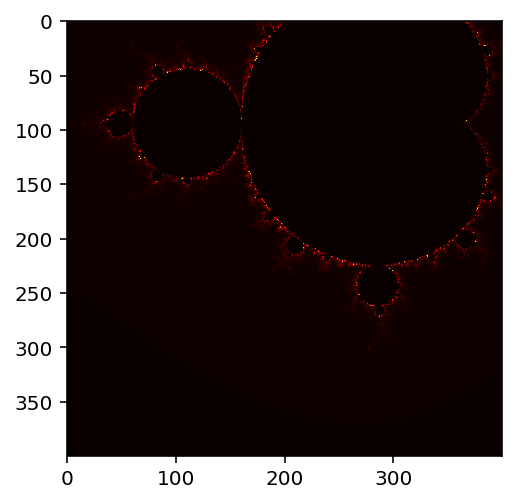

In [10]:
zoomin = 1

C = makeMatrix(-0.55082-zoomin, -0.55082+zoomin, 0.53151-zoomin, 0.53151+zoomin, 400, 400)
maxiter = 1000

N = mandelbrotSet(C, maxiter)

plt.imshow(N, cmap = "hot")

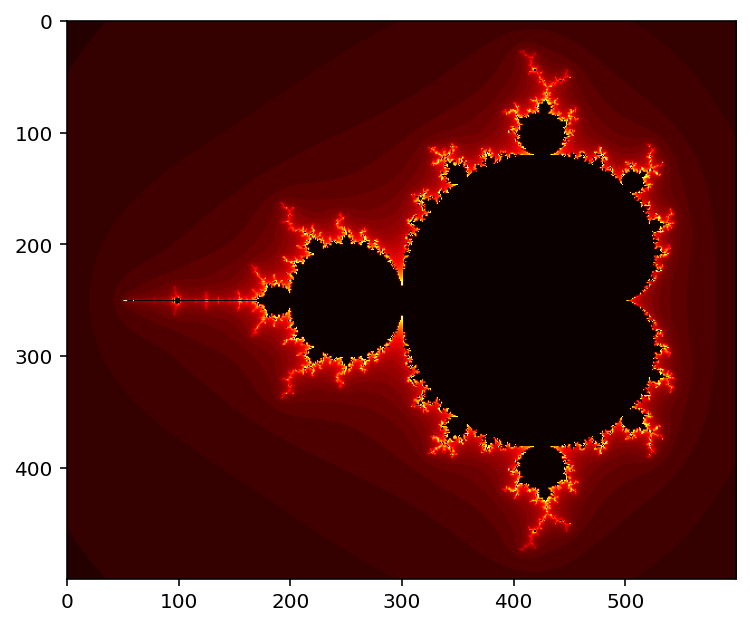

In [25]:
# THIS PLOTS MANDELBROT ITERATIVELY

metadata = dict(title='mandelbrot', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=200000) # change fps for different frame rates
fig, ax = plt.subplots(figsize=(6,6))

num_iterations = 50

with writer.saving(fig, "mandelbrot.mp4", dpi=200):
    for i in range(num_iterations):

        ax.clear() # first clear the figure

        C = makeMatrix(-2.25, 0.75, -1.25, 1.25, 600, 500)
        maxiter = i
        N = mandelbrotSet(C, maxiter)

        ax.imshow(N,cmap="hot")
        plt.draw()
        writer.grab_frame()

In [ ]:
# THIS PLOTS MANDELBROT ZOOMIN ITERATIVELY

metadata = dict(title='mandelbrotZOOMmore', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=200000) # change fps for different frame rates
fig, ax = plt.subplots(figsize=(6,6))

num_iterations = 300

with writer.saving(fig, "mandelbrotZOOMmore.mp4", dpi=200):
    for i in range(1,num_iterations+1):

        ax.clear() # first clear the figure
        
        zlimit=0.0000046   #zoom factor stuff
        slope=(zlimit-1.5)/299
        yint= 1.5
        zoomin=(slope*(i-1))+yint
        
        C = makeMatrix(-0.55075-zoomin, -0.55075+zoomin, 0.53165-zoomin, 0.53165+zoomin, 400, 400)
        maxiter = ((800/299)*(i-1))+200
        N = mandelbrotSet(C, maxiter)

        ax.imshow(N,cmap="hot")
        plt.draw()
        writer.grab_frame()